In [24]:
import numpy as np
from auditory_cortex.dataset import NeuralData
from auditory_cortex import utils, config, results_dir

import seaborn as sns
import matplotlib.pylab as plt
def plot_medians(norm_dist, ch):
    normalizer_medians = []
    normalizer_dev = []
    num_sents_list = []
    for k,v in norm_dist.items():
        normalizer_medians.append(np.median(v[:,ch]))
        normalizer_dev.append(np.std(v[:,ch]))
        num_sents_list.append(k)
    plt.plot(num_sents_list, normalizer_medians)
    # sns.lineplot(x=num_sents_list, y=normalizer_medians, errorbar=normalizer_dev)
    plt.title(f"Median normalizers: session-{session}, ch-{ch}")

def compute_normalizer_dist(dataset, num_sents=5, n_itr = 10000, bin_width = 20, delay=0):
    """Compute distribution of normalizer using given number of 
    sents (having repeated trials)"""
    sents = np.array([12,13,32,43,56,163,212,218,287,308])
    if num_sents > sents.size:
        num_sents = sents.size
        print(f"At max {num_sents} sents can be used.")

    sent_ids = np.random.choice(sents, size=num_sents, replace=False)
    # ids = np.random.randint(len(sents), size=num_sents)
    # sent_ids = np.array(sents)[ids]

    all_repeated_trials = dataset.get_repeated_trials(sents=sent_ids, bin_width=bin_width, delay=delay)
    normalizer_dist = utils.inter_trial_corr(all_repeated_trials, n=n_itr)

    return normalizer_dist


In [2]:
data_dir = config['neural_data_dir']
session = '200206'
dataset = NeuralData(data_dir, session)

Loading Neural data for session: 200206 ... Done.


In [3]:
normalizer_dist = {}
num_sents_list = [2,3,4,5,6,7,8,9,10]
for num_sents in num_sents_list:
    dist = compute_normalizer_dist(dataset=dataset, num_sents=num_sents)
    normalizer_dist[num_sents] = dist

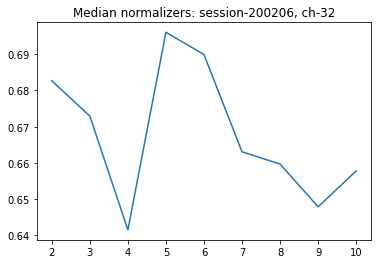

In [8]:
ch = 32
plot_medians(normalizer_dist, ch)

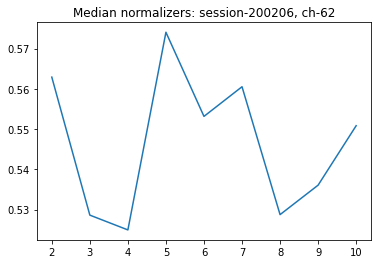

In [9]:
ch = 62
plot_medians(normalizer_dist, ch)

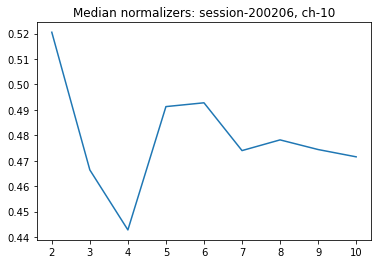

In [25]:
ch = 10
plot_medians(normalizer_dist, ch)

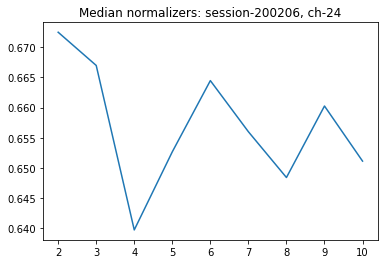

In [11]:
ch = 24
plot_medians(normalizer_dist, ch)

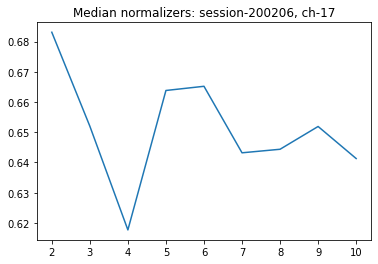

In [12]:
ch = 17
plot_medians(normalizer_dist, ch)

### save distribution...

In [15]:
import os
path = os.path.join(results_dir, f'normalizers_dict_session_{session}.npy')
np.save(path, normalizer_dist)

### load distribution...

In [17]:
session = 200206
path = os.path.join(results_dir, f'normalizers_dict_session_{session}.npy')
norm_dist = np.load(path, allow_pickle=True)

In [21]:
a = np.random.randn(10)
b = np.random.randn(10)

np.corrcoef(a,b)[0,1]

0.7530194152772853

In [ ]:

normalizer_medians = []
ch = 32
for k,v in normalizer_dist.items():
    normalizer_medians.append(np.median(v[:,ch]))
plt.plot(normalizer_medians)
plt.title(f"Median normalizers: session-{session}, ch-{ch}")




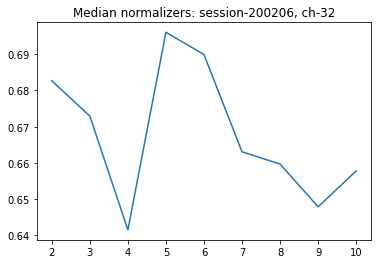

In [18]:
medians = np.median(normalizer_dist, axis=0)

In [19]:
medians[32]

0.6601224200435402